<a href="https://colab.research.google.com/github/lss31/ml/blob/main/%E6%9C%BA%E5%99%A8%E5%AD%A6%E4%B9%A0%E6%9C%9F%E6%9C%AB%E4%BD%9C%E4%B8%9A.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')
!ls

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
drive  gdrive  sample_data


# **1、模块导入**

In [ ]:
#模块导入
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import datetime
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
import tensorflow as tf
from tensorflow.keras import Sequential, layers, utils, losses
from tensorflow.keras.callbacks import ModelCheckpoint, TensorBoard
import warnings
from tensorflow.keras.models import load_model
warnings.filterwarnings('ignore')



# **2、加载数据集、预处理**



In [ ]:
#加载数据库、预处理
dataset_ori=pd.read_excel('/content/drive/MyDrive/Colab Notebooks/数据集/dataset_ori.xlsx')
dataset_ori

,msid,timestamp,msinstanceid,instance_cpu_usage,instance_memory_usage
0,1,0,9af2ad6c3f1d192c27ab23e645650ad0caa500491f57dd...,0.116333,0.607174
1,1,0,6a741080f765ca845d7571f2366b320255fc4f60bb2269...,0.115542,0.606613
2,1,0,272f948cb2281f7063f03df03fa11f14cacec228427d2c...,0.132458,0.607084
3,1,0,6624e2eea99ae021f44e3624e4d16bde949d78c6170bfa...,0.111000,0.608973
4,1,0,ea92a6d8f1027ddfece965c5466be90db6fe805d5bfed3...,0.112250,0.611363
...,...,...,...,...,...
349891,30,1800000,adc0215d9a8d92116812f7bc0b97f18bfac0b257880453...,0.039208,0.667828
349892,30,1800000,6c0890c140d8136bb7fda047e9777ae53f970b1ebf9222...,0.041792,0.672631
349893,30,1800000,52e541a29f4bd212352b42a3ab5446446f36181acbcaad...,0.043250,0.665617
349894,30,1800000,8addc04d6f1dea7f3d5df716d12614f0d744efef10dc00...,0.037083,0.668769


##**字段说明**
msid:微服务编号<br/>
timestamp:时间戳<br/>
instance_cpu_usage:对应微服务实例cpu使用率<br/>
instance_memory_usage:对应微服务实例内存u使用率



# **3、数据可视化**

字段instance_cpu_usage(对应微服务实例cpu使用率)与字段instance_memory_usage(对应微服务实例内存使用率)的关系

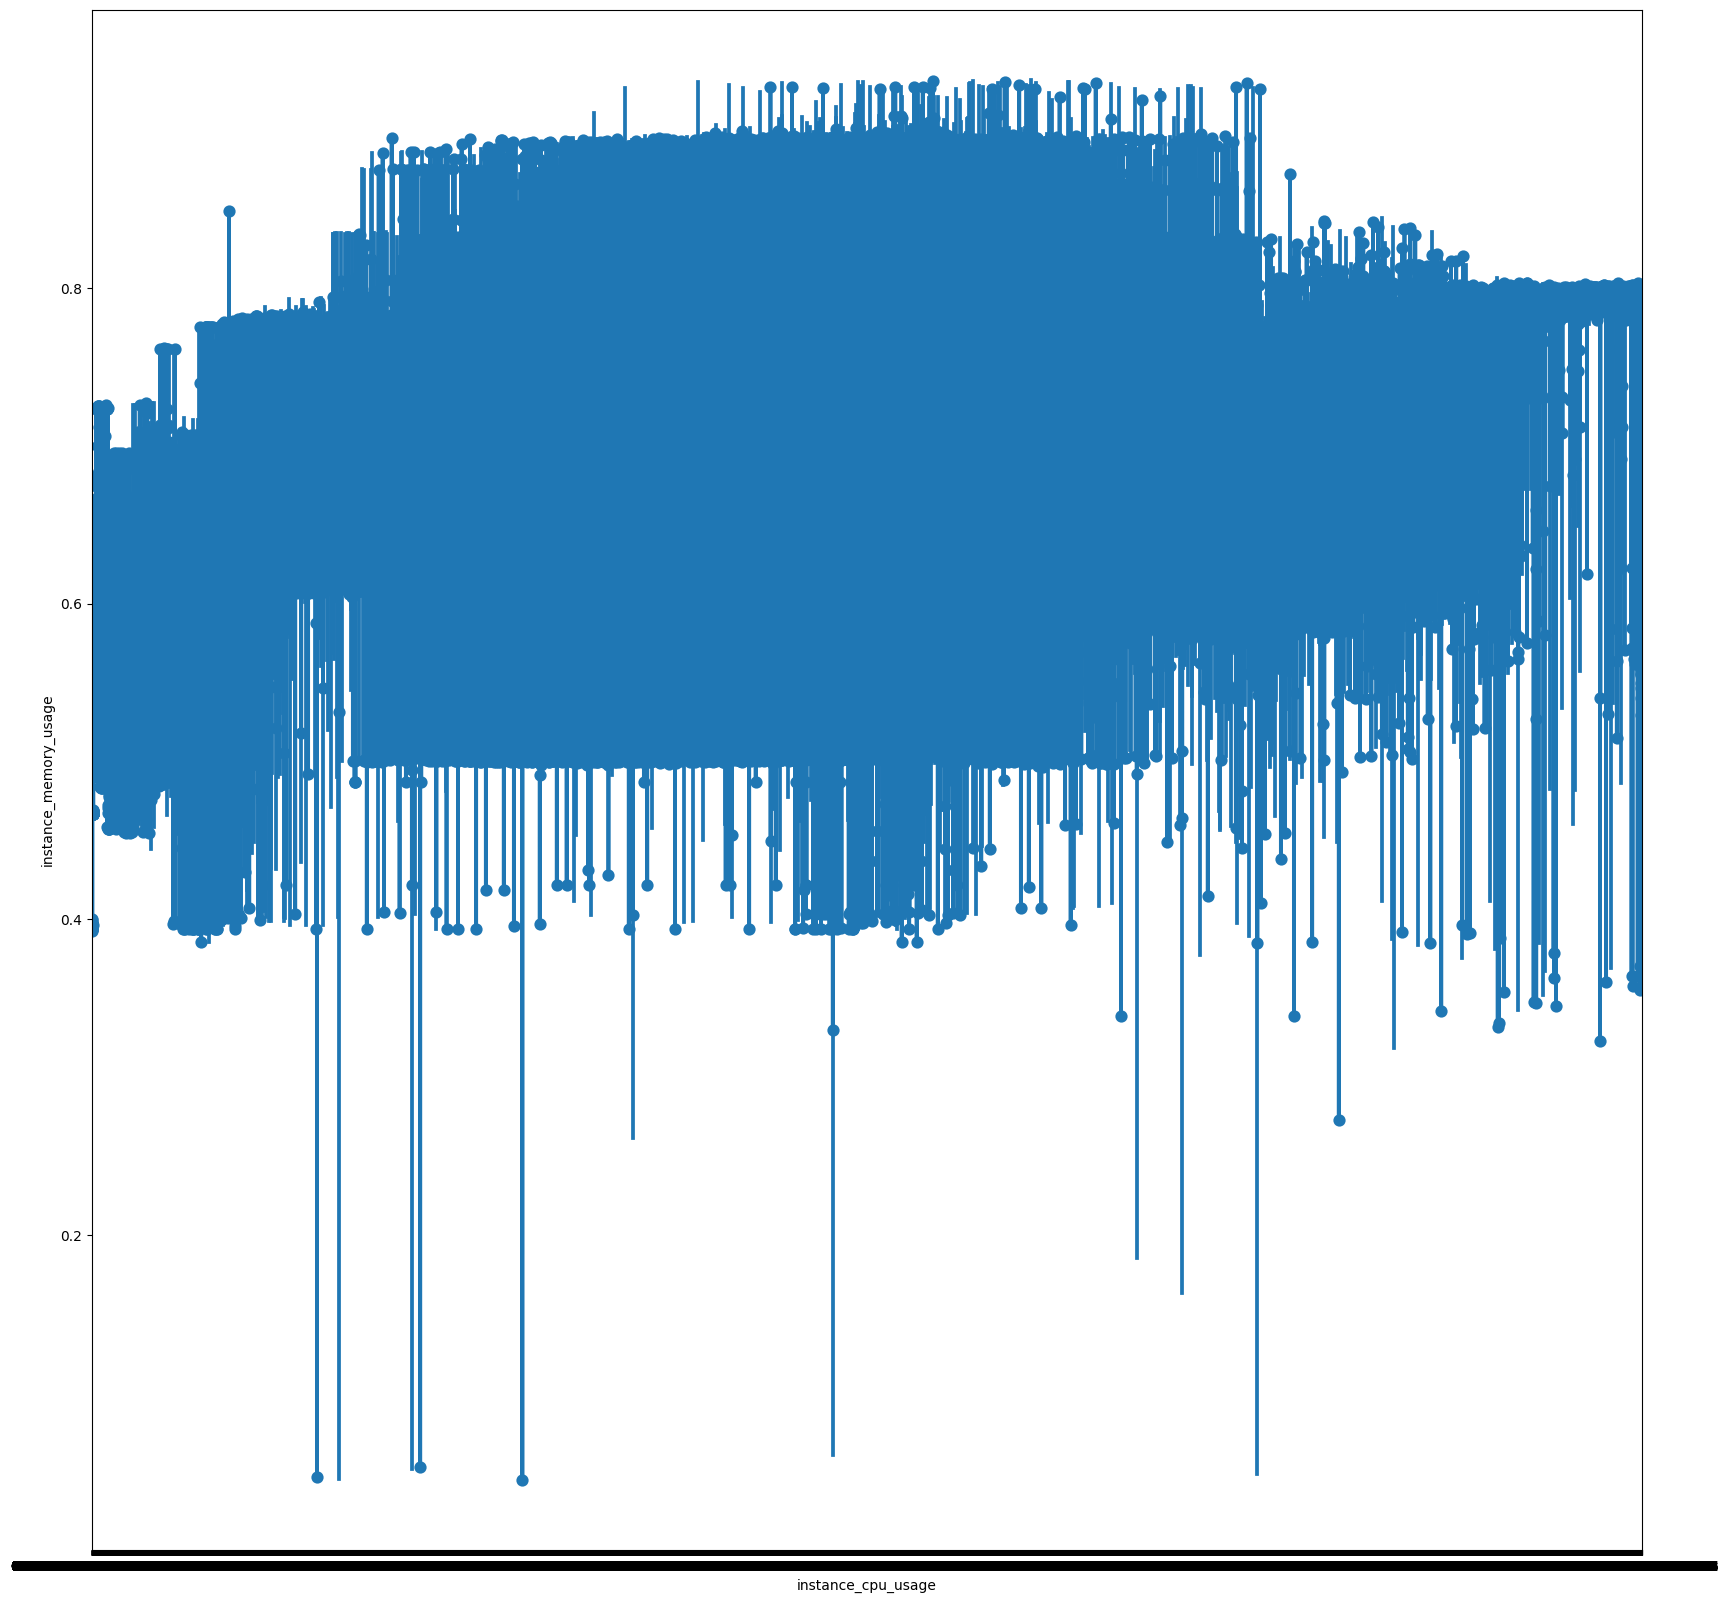

In [ ]:
plt.figure(figsize=(20,20))
sns.pointplot(x='instance_cpu_usage',y='instance_memory_usage',data=dataset_ori)
plt.show()

In [ ]:
dataset_ori['requestnum']=0
for i in range(len(dataset_ori['requestnum'])):#获取不同时刻不同微服务的请求数量
    t=dataset_ori['timestamp'][i]#时刻
    ms=dataset_ori['msid'][i]#微服务
    dataset_bool=((dataset_ori['timestamp']==t)&(dataset_ori['msid']==ms))
    dataset_ori['requestnum'][i]=dataset_bool.sum()


In [ ]:
#处理后的数据保存
# dataset.to_excel('/home/机器学习/数据集/数据集3_after.xlsx')
#读取处理后的数据集
dataset_af=pd.read_excel('/content/drive/MyDrive/Colab Notebooks/数据集/dataset_af.xlsx')
dataset_af
dataset=dataset_af.copy(deep=True)

In [ ]:
#进行dataset_af深拷贝
dataset=dataset_af.copy(deep=True)

In [ ]:
#获取ms号微服务的相关数据集
ms=10
ms_temp=dataset.drop_duplicates(['timestamp','msid'])
ms_dataset=ms_temp[ms_temp.msid==ms]
ms_dataset

,timestamp,msid,msinstanceid,instance_cpu_usage,instance_memory_usage,Request_num
14,0,10,cc77f479d42539468bd63a41e1fba9692f29a8432949db...,0.269292,0.603178,376
5744,30000,10,b5cdc823abf895d4c9efca498d3757915e6febac82e172...,0.277583,0.595481,401
11480,60000,10,4995a8731b6861be76c72bbf4c1f997faf344b000233ed...,0.287750,0.609581,388
17208,90000,10,ca8143ca0ecf45322020574c584436dfffa0a70e6d6072...,0.323000,0.605335,388
22970,120000,10,4fd65faebb0d38185216f5256bee3910e29ad6f662237a...,0.343104,0.580732,449
...,...,...,...,...,...,...
321235,1680000,10,0339d36878c2b1a19066628ae123023826f4b38d3daffb...,0.298979,0.595360,427
326998,1710000,10,6783091984504bdd03228209b9c7f133e50d89e8106ac0...,0.283667,0.585701,387
332688,1740000,10,6ddb14571949e9b5da87beae95bd20546d13deefada98c...,0.307167,0.613569,390
338432,1770000,10,9dd81bc36cf8452b2b01fb351121e1a796406fe66abfbb...,0.274604,0.605546,369


In [ ]:
#对ms号微服务相关数据集进行索引重排
ms_dataset=ms_dataset.reset_index(drop=True)
ms_dataset
ms_dataset.index=ms_dataset.timestamp#将时间戳作为索引
ms_dataset

,timestamp,msid,msinstanceid,instance_cpu_usage,instance_memory_usage,Request_num
timestamp,,,,,,
0,0,10,cc77f479d42539468bd63a41e1fba9692f29a8432949db...,0.269292,0.603178,376
30000,30000,10,b5cdc823abf895d4c9efca498d3757915e6febac82e172...,0.277583,0.595481,401
60000,60000,10,4995a8731b6861be76c72bbf4c1f997faf344b000233ed...,0.287750,0.609581,388
90000,90000,10,ca8143ca0ecf45322020574c584436dfffa0a70e6d6072...,0.323000,0.605335,388
120000,120000,10,4fd65faebb0d38185216f5256bee3910e29ad6f662237a...,0.343104,0.580732,449
...,...,...,...,...,...,...
1680000,1680000,10,0339d36878c2b1a19066628ae123023826f4b38d3daffb...,0.298979,0.595360,427
1710000,1710000,10,6783091984504bdd03228209b9c7f133e50d89e8106ac0...,0.283667,0.585701,387
1740000,1740000,10,6ddb14571949e9b5da87beae95bd20546d13deefada98c...,0.307167,0.613569,390


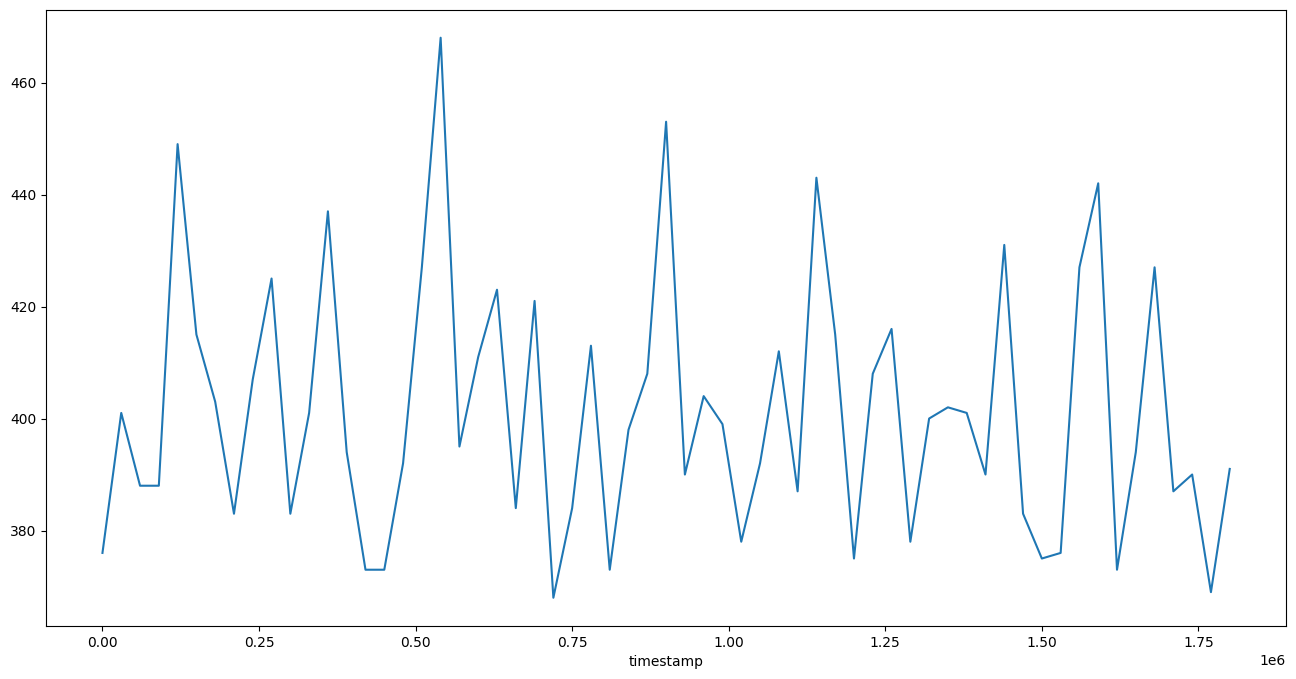

In [ ]:
#可视化显示ms号微服务的请求数量变化情况
ms_dataset['Request_num'].plot(figsize=(16,8))
plt.show()

In [ ]:
#数据进行归一化
scaler=MinMaxScaler()
#reshape(-1,1)第一个-1表示不管多少行，第二个1表示1列
ms_dataset['Request_num']=scaler.fit_transform(ms_dataset['Request_num'].values.reshape(-1,1))
ms_dataset['Request_num']

timestamp
0          0.08
30000      0.33
60000      0.20
90000      0.20
120000     0.81
           ... 
1680000    0.59
1710000    0.19
1740000    0.22
1770000    0.01
1800000    0.23
Name: Request_num, Length: 61, dtype: float64

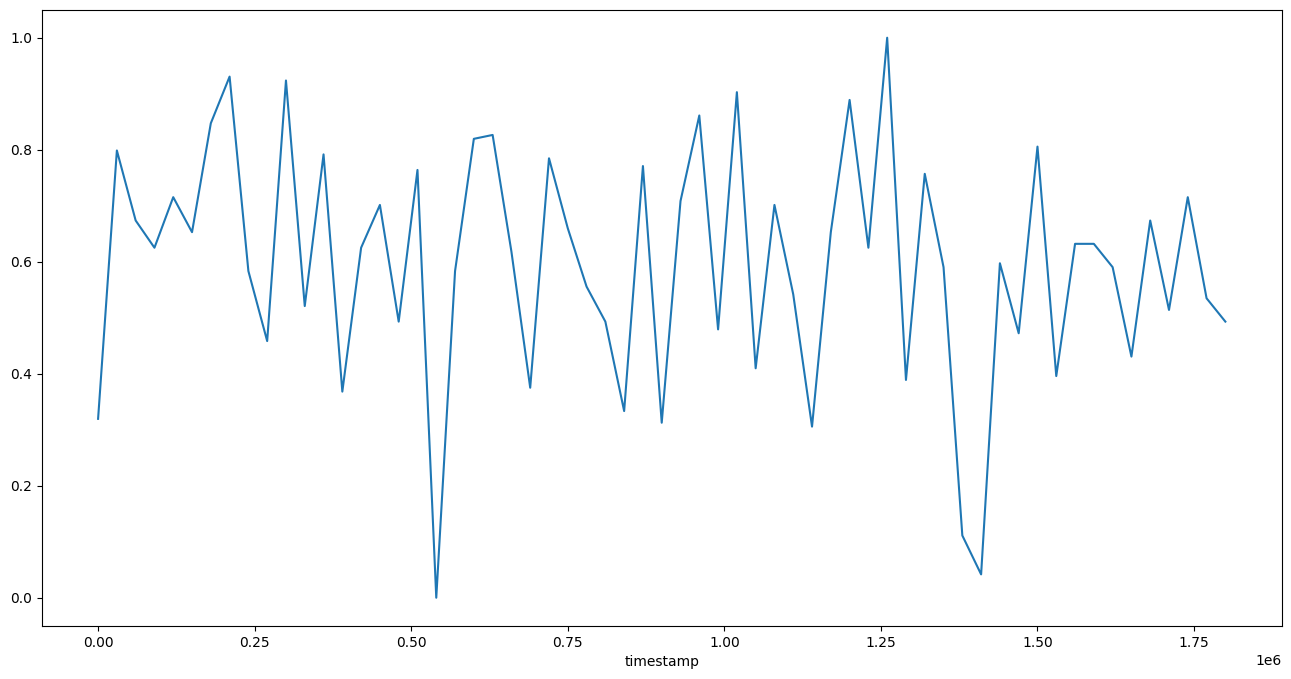

In [ ]:
#可视化归一化后的数据分布
ms_dataset['Request_num'].plot(figsize=(16,8))
plt.show()

# **3、特征工程**

In [ ]:
#功能函数:构造特征数据集和标签集
def create_new_dataset(dataset,seq_len=12):
  '''基于原始数据集构造新的序列特征数据集
    Params:
        dataset : 原始数据集
        seq_len : 序列长度（时间跨度） 滑动窗口

    Returns:
        X, y
  '''
  X=[]#初始特征数据集为空列表
  Y=[]#初始标签数据集为空列表
  start = 0 # 初始位置
  end = dataset.shape[0] - seq_len # 截止位置
  for i in range(start,end):
    sample = dataset[i : i+seq_len] # 基于时间跨度seq_len创建样本
    label = dataset[i+seq_len] # 创建sample对应的标签
    X.append(sample) # 保存sample
    Y.append(label) # 保存label
  return np.array(X),np.array(Y)
# 功能函数：基于新的特征的数据集和标签集，切分：X_train, X_test
# 千万不能打乱数据 要有时序
def split_dataset(X, y, train_ratio=0.8):
    '''基于X和y，切分为train和test
    Params:
        X : 特征数据集
        y : 标签数据集
        train_ratio : 训练集占X的比例

    Returns:
        X_train, X_test, y_train, y_test
    '''
    X_len = len(X) # 特征数据集X的样本数量
    train_data_len = int(X_len * train_ratio) # 训练集的样本数量

    X_train = X[:train_data_len] # 训练集
    y_train = y[:train_data_len] # 训练标签集

    X_test = X[train_data_len:] # 测试集
    y_test = y[train_data_len:] # 测试集标签集

    # 返回值
    return X_train, X_test, y_train, y_test

# 功能函数：基于新的X_train, X_test, y_train, y_test创建批数据(batch dataset)
def create_batch_data(X, Y, batch_size=32, data_type=1):
    '''基于训练集和测试集，创建批数据
    Params:
        X : 特征数据集
        Y : 标签数据集
        batch_size : batch的大小，即一个数据块里面有几个样本
        data_type : 数据集类型（测试集表示1，训练集表示2）

    Returns:
        train_batch_data 或 test_batch_data
    '''
    if data_type == 1: # 测试集
        dataset = tf.data.Dataset.from_tensor_slices((tf.constant(X), tf.constant(Y))) # 封装X和y，成为tensor类型,进行数据特征与标签切片，一个特征对应一个标签
        test_batch_data = dataset.batch(batch_size) # 构造批数据，从dataset中抽取batch_size个样本
        # 返回
        return test_batch_data
    else: # 训练集
        dataset = tf.data.Dataset.from_tensor_slices((tf.constant(X), tf.constant(Y))) # 封装X和y，一一对应，成为tensor类型
        # 训练集数据量较大，可以加载到内存中去 打乱1000 获得更好地泛化性能
        train_batch_data = dataset.cache().shuffle(1000).batch(batch_size) # 构造批数据
        # 返回
        return train_batch_data


In [ ]:
#原始数据集
dataset_original=ms_dataset
dataset_original.drop(columns=['msid','timestamp','msinstanceid','instance_cpu_usage','instance_memory_usage'],axis=1,inplace=True)
dataset_original

#构造特征数据集和标签集，seq_len序列长度为12
SEQ_LEN=12#序列长度
x,y=create_new_dataset(dataset_original.values,seq_len = SEQ_LEN)

#数据集切分
X_train, X_test, y_train, y_test = split_dataset(x, y, train_ratio=0.9)

#基于新的X_train, X_test, y_train, y_test创建批数据(batch dataset)
# X_train=X_train.astype('float64')
# X_test=X_test.astype('float64')
# y_train=y_train.astype('float64')
# y_test=y_test.astype('float64')
# 测试批数据
test_batch_dataset = create_batch_data(X_test, y_test, batch_size=256, data_type=1)

# 训练批数据
train_batch_dataset = create_batch_data(X_train, y_train, batch_size=256, data_type=2)

# **4、构建模型**

In [ ]:
model=Sequential([
    layers.LSTM(8,input_shape=(SEQ_LEN,1)),
    #全连接层只有一个预测值
    layers.Dense(1)
])

#定义checkpoint,保存权重文件
file_path="/content/drive/MyDrive/Colab Notebooks/模型/ms%d.hdf5"%ms

#最小损失权重
#调用keras的ModelCheckpoint函数保存确定模型存放路径，根据损失值做出保存决策
checkpoint_callback=tf.keras.callbacks.ModelCheckpoint(filepath=file_path,monitor='loss',mode='min',save_best_only=True,save_weight_only=True)
#导入模型
# model=load_model(file_path)

# **5、模型编译、训练、验证**

流式输出内容被截断，只能显示最后 5000 行内容。
1/1 [==============================] - 0s 27ms/step - loss: 0.0757 - val_loss: 0.1433
Epoch 7502/10000
1/1 [==============================] - 0s 22ms/step - loss: 0.0752 - val_loss: 0.1467
Epoch 7503/10000
1/1 [==============================] - 0s 22ms/step - loss: 0.0761 - val_loss: 0.1462
Epoch 7504/10000
1/1 [==============================] - 0s 21ms/step - loss: 0.0745 - val_loss: 0.1445
Epoch 7505/10000
1/1 [==============================] - 0s 22ms/step - loss: 0.0766 - val_loss: 0.1465
Epoch 7506/10000
1/1 [==============================] - 0s 27ms/step - loss: 0.0745 - val_loss: 0.1484
Epoch 7507/10000
1/1 [==============================] - 0s 28ms/step - loss: 0.0783 - val_loss: 0.1443
Epoch 7508/10000
1/1 [==============================] - 0s 24ms/step - loss: 0.0746 - val_loss: 0.1417
Epoch 7509/10000
1/1 [==============================] - 0s 23ms/step - loss: 0.0788 - val_loss: 0.1437
Epoch 7510/10000
1/1 [==============================] - 0s 23ms

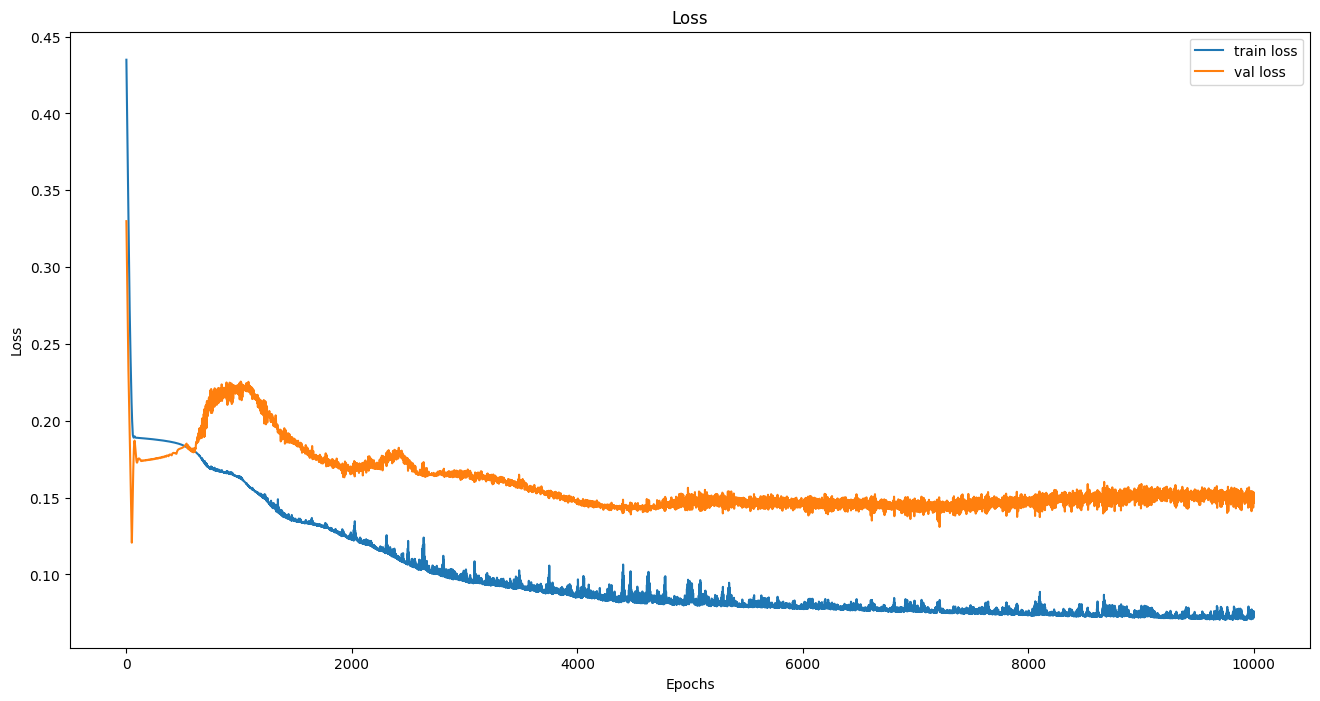

In [ ]:
#模型编译
model.compile(optimizer='adam',loss='mae')#进行编译，优化器为adam，损失函数为mae

#模型训练
history=model.fit(train_batch_dataset,epochs=10000,validation_data=test_batch_dataset,callbacks=[checkpoint_callback])#返回值为一个histort对象，记录loss和其他指标的数值随epoch变化的情况
#迭代次数为10000，验证数据为test_batch_dataset，训练数据为train_batch_dataset，callbacks表示每次迭代结束通过回调函数进行模型保存

#显示train loss和val loss
plt.figure(figsize=(16,8))
plt.plot(history.history['loss'],label='train loss')#训练值
plt.plot(history.history['val_loss'],label='val loss')#实际值
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc='best')
plt.show()


In [ ]:
#模型验证
test_pred = model.predict(X_test, verbose=1)#以提示模式进行数据预测


1/1 [==============================] - 0s 334ms/step


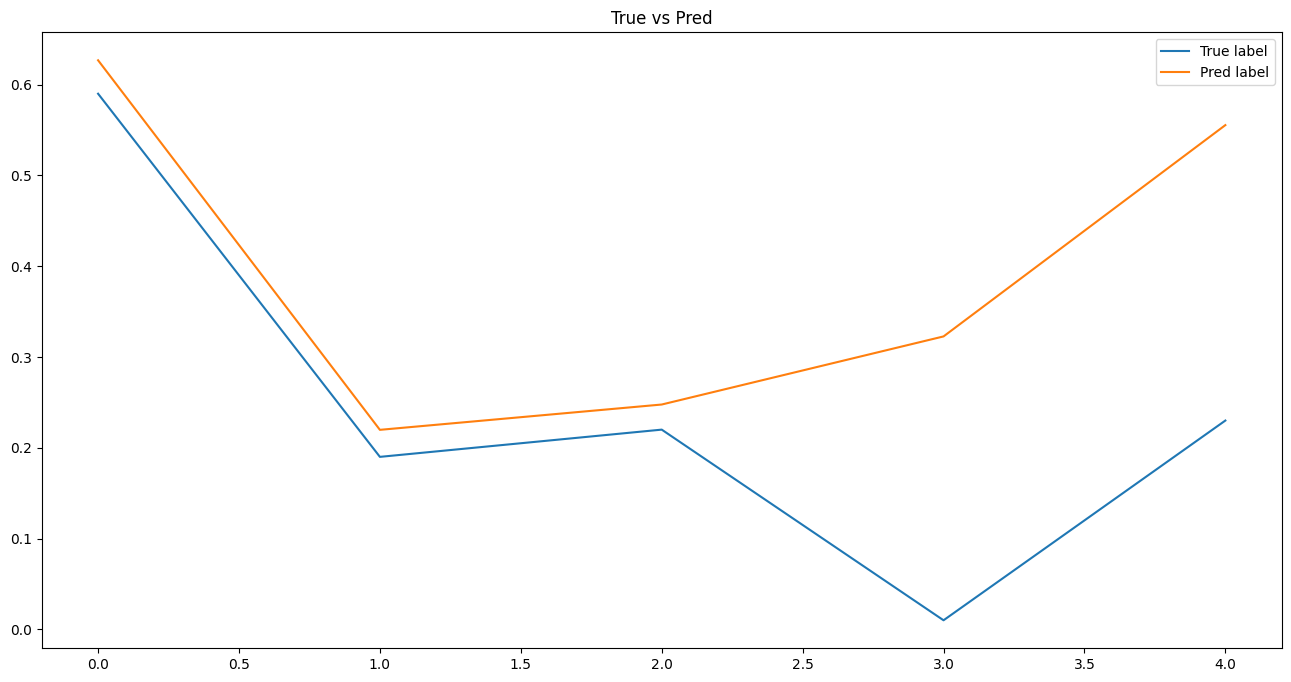

In [ ]:
# 绘制模型验证结果

plt.figure(figsize=(16,8))
plt.plot(y_test, label="True label")
plt.plot(test_pred, label="Pred label")
plt.title("True vs Pred")
plt.legend(loc='best')
plt.show()

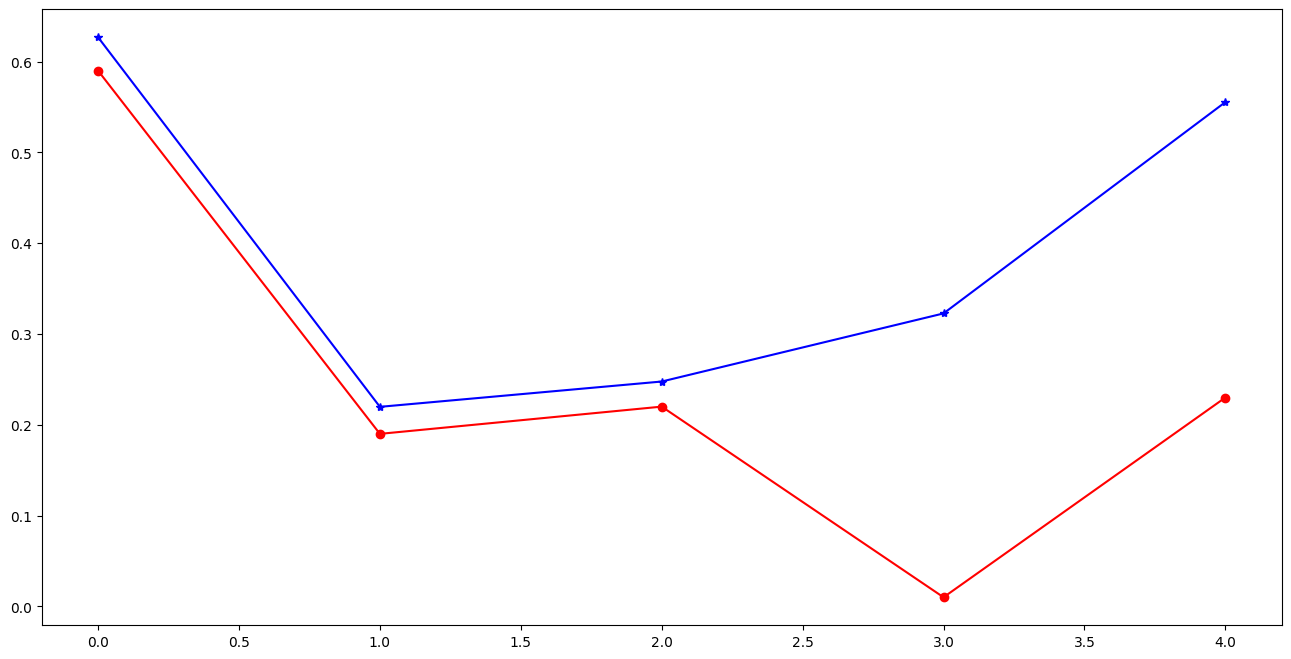

In [ ]:
# 绘制test中前5个点的真值与预测值

y_true = y_test[:5]
y_pred = test_pred[:5]
plt.figure(figsize=(16, 8))
plt.plot(y_true, marker='o', color='red')
plt.plot(y_pred, marker='*', color='blue')
plt.show()

# **6、模型测试**

In [ ]:
# 选择test中的最后一个样本
sample = X_test[-1] # (12, 1)
sample = sample.reshape(1, sample.shape[0], 1) # (1, 12, 1)

# 模型预测
sample_pred = model.predict(sample)
sample_pred

1/1 [==============================] - 0s 15ms/step


array([[0.5554198]], dtype=float32)

**预测后续20个点的值**

In [ ]:
ture_data = X_test[-1] # 真实test的最后12个数据点 (12, 1)
ture_data

array([[0.63],
       [0.15],
       [0.07],
       [0.08],
       [0.59],
       [0.74],
       [0.05],
       [0.26],
       [0.59],
       [0.19],
       [0.22],
       [0.01]])

1/1 [==============================] - 0s 16ms/step


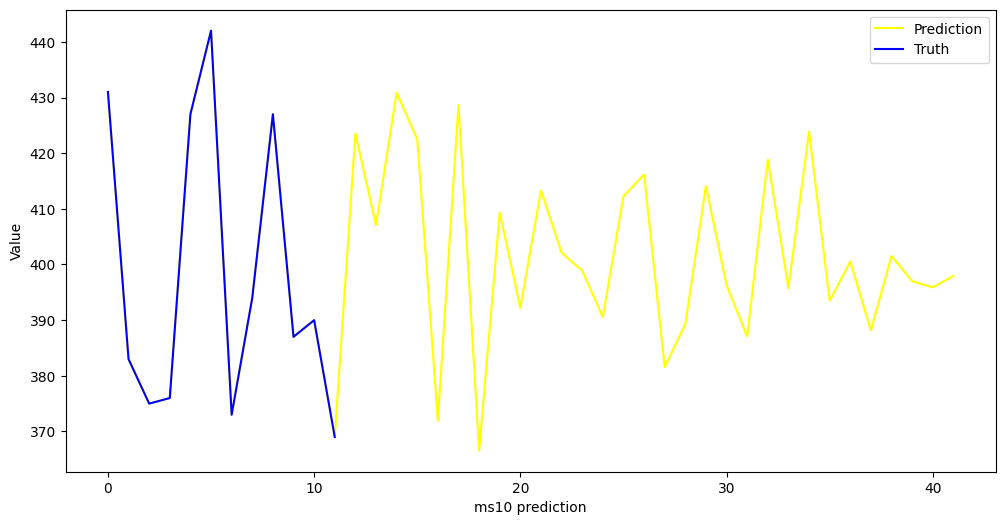

In [ ]:
def predict_next(model,sample,epoch=20):
  temp1=list(sample[:,0])#取所有样本的第0个数据
  for i in range(epoch):
    sample=sample.reshape(1,SEQ_LEN,1)
    # print(sample)
    pred=model.predict(sample)#利用模型对输入的数据进行预测
    value=pred.tolist()[0][0]
    temp1.append(value)
    sample = np.array(temp1[i+1 : i+SEQ_LEN+1])
  return temp1

preds = predict_next(model, ture_data, 30)
plt.figure(figsize=(12,6))
preds=np.array(preds)
ture_data=np.array(ture_data)
preds=scaler.inverse_transform(preds.reshape(-1,1))
ture_data=scaler.inverse_transform(ture_data.reshape(-1,1))
plt.plot(preds,color='yellow',label='Prediction')
plt.plot(ture_data,color='blue',label='Truth')
plt.xlabel("ms%d prediction"%ms)
plt.ylabel("Value")
plt.legend(loc='best')
plt.show()